In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
plt.close("all")

def converter_presenca(df, coluna='Presença'):
    df[coluna] = (
        df[coluna]
        .astype(str)  
        .str.strip() 
        .str.replace(',', '.', regex=True)  
        .str.replace('%', '', regex=True)  
        .astype(float) 
    )
    return df

PCT = 0.05

matutino2_chamada = pd.read_csv('Chamada - Introcomp 2024 - Módulo 2 - Matutino(1).csv')
matutino2_chamada = converter_presenca(matutino2_chamada)
matutino2_chamada.rename(columns={'Unnamed: 0': 'Nome'}, inplace=True)

vespertino2_chamada = pd.read_csv('Chamada - Introcomp 2024 - Módulo 2 - Vespertino(1).csv')
vespertino2_chamada = converter_presenca(vespertino2_chamada)
vespertino2_chamada.rename(columns={'Unnamed: 0': 'Nome'}, inplace=True)

#o nome do luiz tava errado na tabela de chamada...
matutino2_chamada['Nome'] = matutino2_chamada['Nome'].replace(
    "luiz antônio de paula da silva toledo",
    "luiz antönio de paula da silva toledo"
)
#e do paulo tambem....
matutino2_chamada['Nome'] = matutino2_chamada['Nome'].replace(
    "paulo vítor borges sangali",
    "paulo vítor borge sangali"
)

faltaM_2 = matutino2_chamada[matutino2_chamada['Presença'] < 50]
faltaV_2 = vespertino2_chamada[vespertino2_chamada['Presença'] < 50]

alunos_manha = pd.read_csv('Processo Seletivo 2024 - Aprovados matutino.csv')
alunos_manha.rename(columns={'name': 'Nome'}, inplace=True)
alunos_manha.Nome = alunos_manha.Nome.str.lower()

alunos_tarde = pd.read_csv('Processo Seletivo 2024 - Aprovados vespertino.csv')
alunos_tarde.rename(columns={'name': 'Nome'}, inplace=True)
alunos_tarde.Nome = alunos_tarde.Nome.str.lower()

alunos_geral = pd.concat([alunos_manha, alunos_tarde], ignore_index= True)

nome_evadidos = pd.concat([faltaM_2['Nome'], faltaV_2['Nome']], ignore_index= True)
nome_evadidos = nome_evadidos.to_frame('Nome')
nome_evadidos.Nome = nome_evadidos.Nome.str.lower() 

nome_matutino = matutino2_chamada['Nome']
nome_vespertino = vespertino2_chamada['Nome']
nome_vespertino = nome_vespertino.str.lower()
nome_vespertino = nome_vespertino.to_frame('Nome')
nome_matutino = nome_matutino.str.lower()
nome_matutino = nome_matutino.to_frame('Nome')

qnd_evadidos = len(faltaM_2) + len(faltaV_2)
qnd_alunos2 = len(nome_matutino) + len(nome_vespertino)
nome_geral = pd.concat([nome_matutino['Nome'], nome_vespertino['Nome']], ignore_index= True)
nome_geral = nome_geral.to_frame('Nome')
nome_geral.Nome = nome_geral.Nome.str.lower() 
nome_geral

,Nome
0,arthur oliveira dos santos
1,daniel santana rocha
2,daniel vitória luiz
3,eduardo de oliveira pralon
4,enzo bossetti mazioli
5,guilherme arnizaut martins
6,gustavo cesar pontes soares
7,isabella miranda firme dobrowolsky
8,isaque nascimento rodrigues da silva
9,joão henrique inácio de souza


In [29]:
inscritos = pd.read_csv('Inscrições 2024 - Página1.csv')
inscritos.rename(columns={'name': 'Nome'}, inplace=True)
inscritos.Nome = inscritos.Nome.str.lower()

COLUMNS_INSCRITOS = ['Nome', 'cidade', 'sabe programar', 'escolaridade', 'genero', 'tem computador', 'tem internet'] #obrigado gabriel s2
inscritos = inscritos.loc[:, COLUMNS_INSCRITOS]

dados_evadidos = pd.merge(nome_evadidos, inscritos, left_on= 'Nome', right_on='Nome')
dados_evadidos
dados_geral = pd.merge(nome_geral, inscritos, left_on= 'Nome', right_on= 'Nome')
dados_geral

,Nome,cidade,sabe programar,escolaridade,genero,tem computador,tem internet
0,arthur oliveira dos santos,Vila Velha,True,3° ano (Ensino Médio),male,True,True
1,daniel santana rocha,Serra,False,2° ano (Ensino Médio),male,True,True
2,daniel vitória luiz,Serra,False,2° ano (Ensino Médio),male,False,True
3,eduardo de oliveira pralon,Cariacica,False,2° ano (Ensino Médio),male,True,True
4,enzo bossetti mazioli,Cariacica,True,1° ano (Ensino Médio),male,True,True
5,guilherme arnizaut martins,Vitória,True,3° ano (Ensino Médio),male,True,True
6,gustavo cesar pontes soares,Vila Velha,False,3° ano (Ensino Médio),male,True,True
7,isabella miranda firme dobrowolsky,Cariacica,True,3° ano (Ensino Médio),female,True,True
8,isaque nascimento rodrigues da silva,Cariacica,False,2° ano (Ensino Médio),male,True,True
9,joão henrique inácio de souza,Vitória,False,3° ano (Ensino Médio),male,True,True


In [3]:
resultado_matutino = pd.read_csv('Notas módulo 2 - Matutino_Notas.csv')
resultado_matutino.rename(columns={'name': 'Nome'}, inplace=True)
resultado_matutino = resultado_matutino.loc[:, ['Nome', 'Trabalho', 'Resultado']]
resultado_matutino.Nome = resultado_matutino.Nome.str.lower()


Resultado
REPROVADO    20
APROVADO      8
Name: , dtype: int64


<Axes: title={'center': 'Aprovados no turno matutino'}>

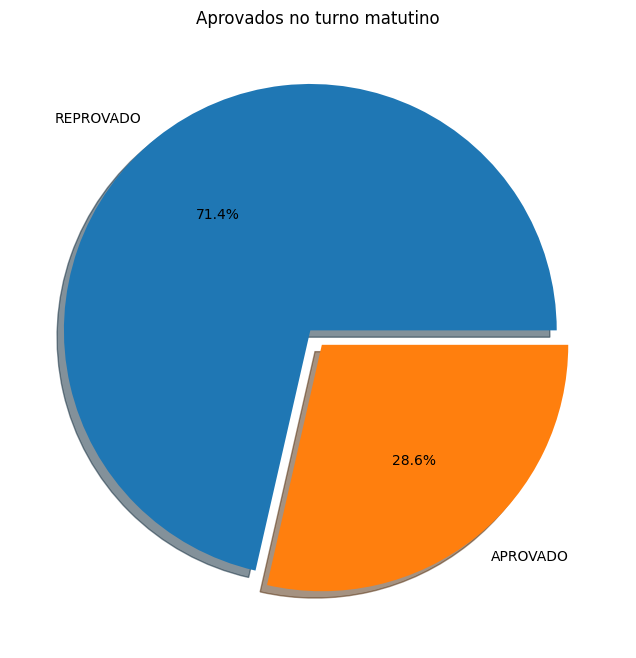

In [4]:
grafico_matutino = analisa(resultado_matutino, 'Resultado', PCT, False)
grafico_matutino.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025),
    title = (f"Aprovados no turno matutino")
)

In [5]:
resultado_vespertino = pd.read_csv('Notas módulo 2 - Vespertino_Notas.csv')
resultado_vespertino.rename(columns={'name': 'Nome'}, inplace=True)
resultado_vespertino = resultado_vespertino.loc[:, ['Nome', 'Trabalho', 'Resultado']]
resultado_vespertino.Nome = resultado_vespertino.Nome.str.lower()
resultado_vespertino

,Nome,Trabalho,Resultado
0,alexandre paganini marques,"12,3",APROVADO
1,gustavo de souza neves,10,APROVADO
2,alex da rocha silva,0,REPROVADO
3,beatriz barreto buzatto,0,REPROVADO
4,carlos daniel ferreira araujo,0,REPROVADO
5,danyllo duque zanella gonçalves,0,REPROVADO
6,dyego nascimento ferreira,0,REPROVADO
7,enzo klippel,0,REPROVADO
8,fábio da costa luciani,0,REPROVADO
9,flávio vinícius alves da silva,0,REPROVADO


Resultado
REPROVADO    19
APROVADO      2
Name: , dtype: int64


<Axes: title={'center': 'aprovados no turno vespertino'}>

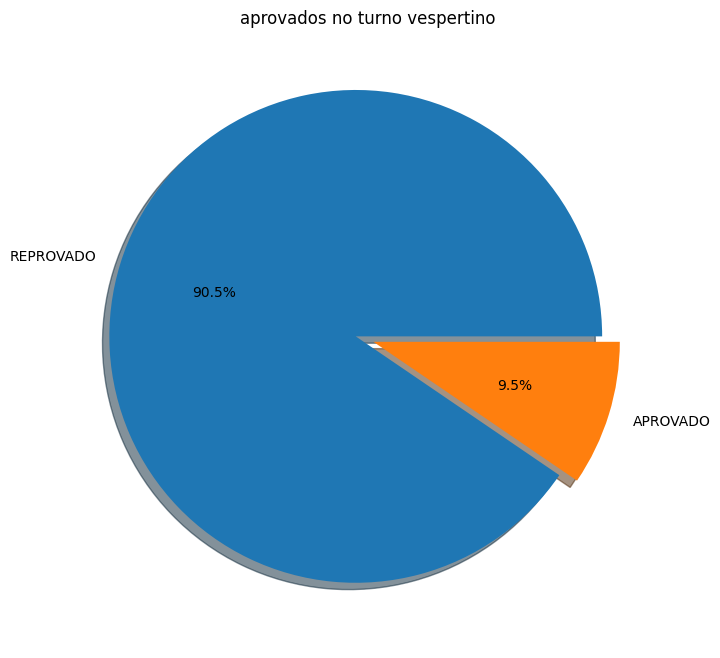

In [6]:
grafico_vespertino = analisa(resultado_vespertino, 'Resultado', PCT, False)
grafico_vespertino.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025),
    title = (f"aprovados no turno vespertino")
)

In [7]:
matutino_aprovado = resultado_matutino[resultado_matutino['Resultado'] == 'APROVADO']
vespertino_aprovado = resultado_vespertino[resultado_vespertino['Resultado'] == 'APROVADO']

aprovados = pd.concat([matutino_aprovado, vespertino_aprovado])
geral = pd.concat([nome_matutino, nome_vespertino])
aprovados['Nome'] = aprovados['Nome'].replace(
    "luiz antônio de paula da silva toledo",
    "luiz antönio de paula da silva toledo"
)
#e do paulo tambem....
aprovados['Nome'] = aprovados['Nome'].replace(
    "paulo vítor borges sangali",
    "paulo vítor borge sangali"
)
dados_aprovados = pd.merge(aprovados, inscritos, on='Nome', how='left')
dados_geral = pd.merge(geral, inscritos, on = 'Nome', how = 'left')
dados_aprovados

,Nome,Trabalho,Resultado,cidade,sabe programar,escolaridade,genero,tem computador,tem internet
0,enzo bossetti mazioli,"8,1",APROVADO,Cariacica,True,1° ano (Ensino Médio),male,True,True
1,gustavo cesar pontes soares,"8,1",APROVADO,Vila Velha,False,3° ano (Ensino Médio),male,True,True
2,isabella miranda firme dobrowolsky,"8,1",APROVADO,Cariacica,True,3° ano (Ensino Médio),female,True,True
3,kamilly tostes de freitas,"18,1",APROVADO,Vitória,False,2° ano (Ensino Médio),female,True,True
4,luiz antönio de paula da silva toledo,"15,5",APROVADO,Vitória,True,1° ano (Ensino Médio),male,True,True
5,maria eduarda thomas fernandes luiz,"8,1",APROVADO,Vila Velha,False,3° ano (Ensino Médio),female,True,True
6,paulo vítor borge sangali,10,APROVADO,Guarapari,False,1° ano (Ensino Médio),male,True,True
7,rodrigo hand marques,"18,1",APROVADO,Vila Velha,True,2° ano (Ensino Médio),male,True,True
8,alexandre paganini marques,"12,3",APROVADO,Guarapari,True,1° ano (Ensino Médio),male,True,True
9,gustavo de souza neves,10,APROVADO,Vitória,False,1° ano (Ensino Médio),male,True,True


tem computador
True     40
False     7
Name: , dtype: int64


<Axes: title={'center': 'Alunos do modulo 2 tem computador?'}>

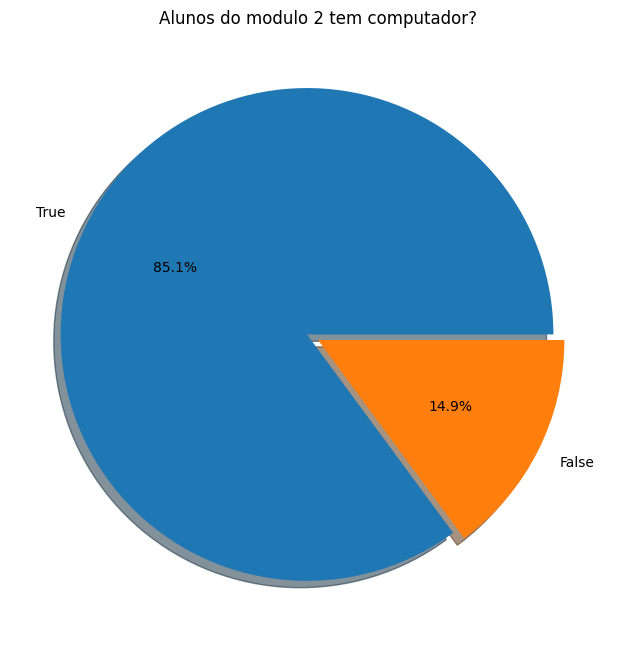

In [8]:
computador_geral = analisa(dados_geral, 'tem computador', PCT, False)
computador_geral.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode = (0.05, 0),
    title = (f"Alunos do modulo 2 tem computador?")
)

tem internet
True     46
False     1
Name: tem internet, dtype: int64


<Axes: title={'center': 'Alunos do modulo 2 tem internet?'}, ylabel='tem internet'>

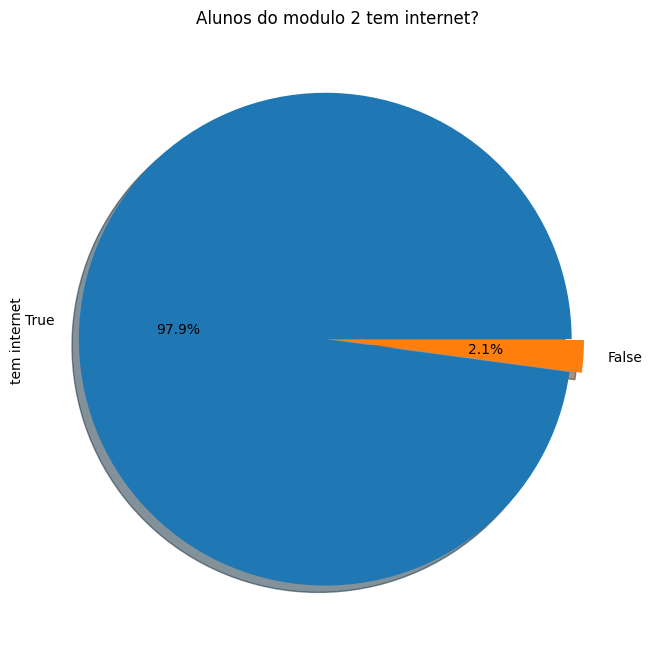

In [9]:
internet_geral = analisa(dados_geral, 'tem internet', False)
internet_geral.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode = (0.05, 0),
    title = (f"Alunos do modulo 2 tem internet?")
)

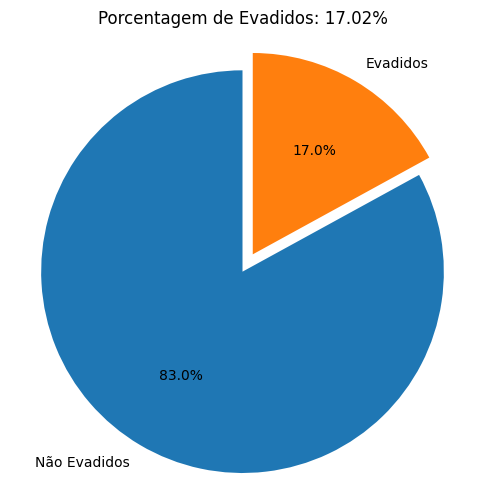

In [10]:
porcentagem_evadidos = (qnd_evadidos / qnd_alunos2) * 100


labels = ['Não Evadidos', 'Evadidos']
sizes = [qnd_alunos2 - qnd_evadidos, qnd_evadidos ]
explode = (0.1, 0)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Porcentagem de Evadidos: {porcentagem_evadidos:.2f}%')
plt.axis('equal')  
plt.show()

tem computador
True    10
Name: , dtype: int64


<Axes: title={'center': 'Alunos aprovados do modulo 2 tem computador?'}>

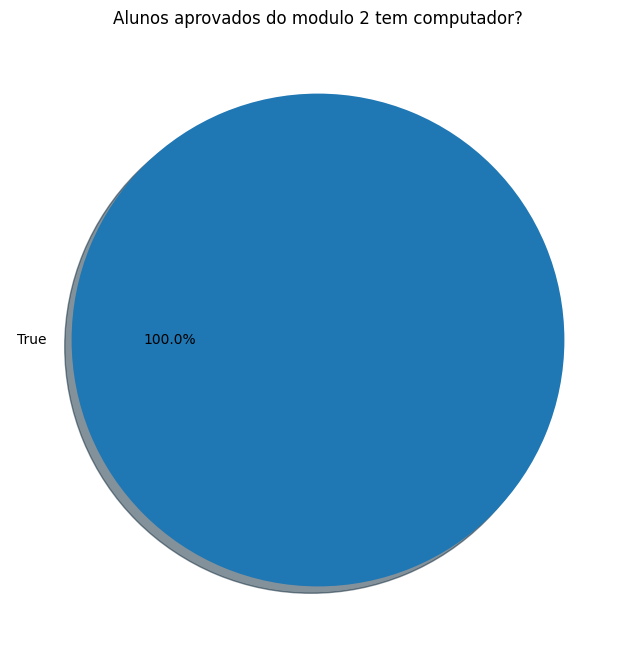

In [11]:
computador_aprovados = analisa(dados_aprovados, 'tem computador', PCT, False)
computador_aprovados.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    #explode = (0.05),
    title = (f"Alunos aprovados do modulo 2 tem computador?")
)

tem internet
True    10
Name: , dtype: int64


<Axes: title={'center': 'Alunos aprovados do modulo 2 tem internet?'}>

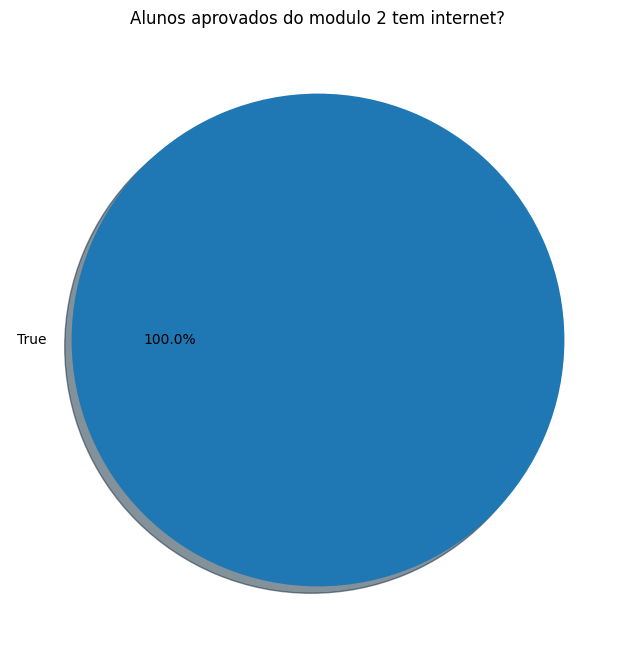

In [12]:
internet_aprovados = analisa(dados_aprovados, 'tem internet', PCT, False)
internet_aprovados.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    #explode = (0.05),
    title = (f"Alunos aprovados do modulo 2 tem internet?")
)

sabe programar
True     5
False    5
Name: , dtype: int64


<Axes: title={'center': 'Alunos aprovados do modulo 2 sabem programar?'}>

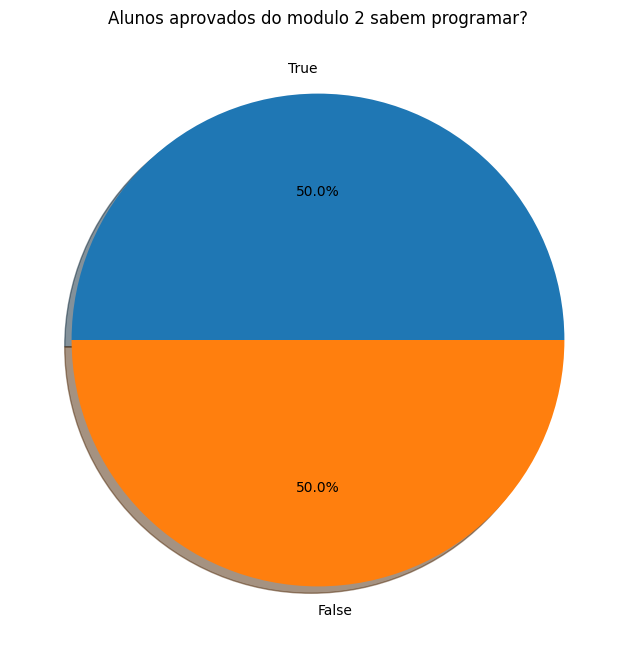

In [13]:
programar_aprovados = analisa(dados_aprovados, 'sabe programar', PCT, False)
programar_aprovados.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    #explode = (0.05, 0),
    title = (f"Alunos aprovados do modulo 2 sabem programar?")
)

cidade
Vila Velha    3
Vitória       3
Cariacica     2
Guarapari     2
Name: , dtype: int64


<Axes: title={'center': 'Cidade dos aprovados:'}>

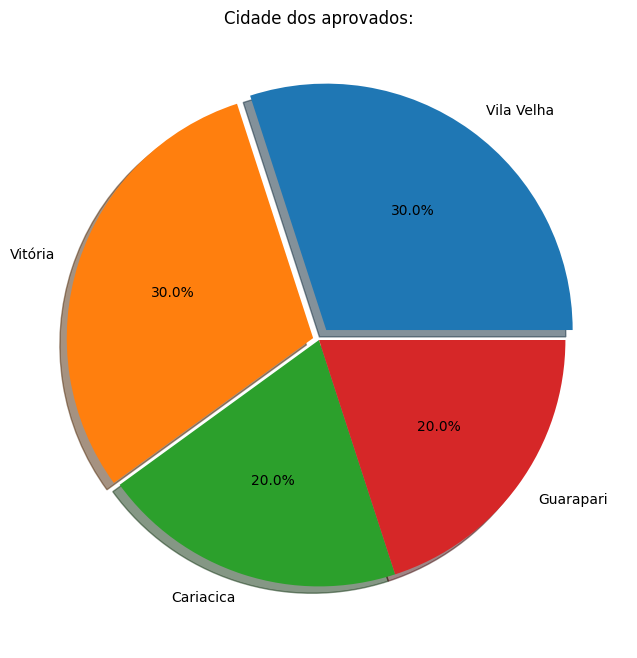

In [14]:
cidade_aprovados = analisa(dados_aprovados, 'cidade', PCT, False)
cidade_aprovados.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025, 0, 0),
    title = (f'Cidade dos aprovados:')
)

escolaridade
1° ano (Ensino Médio)    5
3° ano (Ensino Médio)    3
2° ano (Ensino Médio)    2
Name: , dtype: int64


<Axes: >

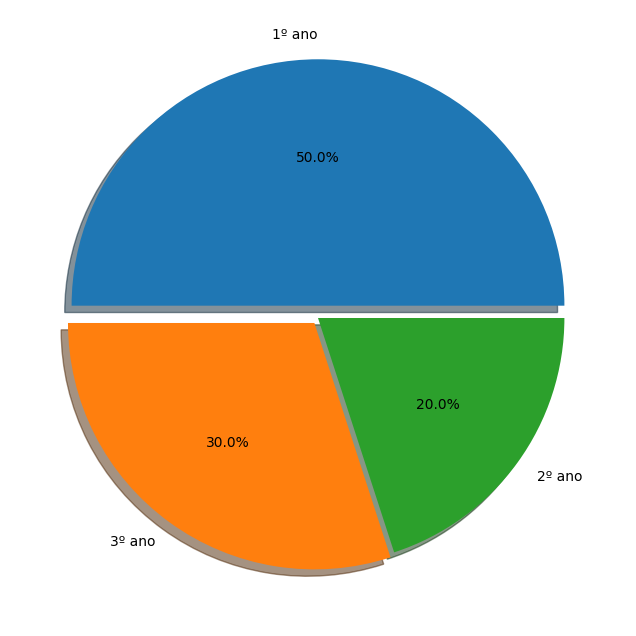

In [16]:
escolaridade = analisa(dados_aprovados, 'escolaridade', PCT, False)

#se eu nao fizer isso, na hora de fazer o grafico de barras fica um nome em cima do outro
nomes_curto = {
    "1° ano (Ensino Médio)": "1º ano",
    "2° ano (Ensino Médio)": "2º ano",
    "3° ano (Ensino Médio)": "3º ano",
    "Ensino médio completo até 2023": "Comp. 2023",
    "Ensino médio completo até 2022": "Comp. 2022",
    "EJA (Ensino médio)": "EJA"
}
escolaridade = escolaridade.rename(index=nomes_curto)

escolaridade.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025, 0)
)

genero
male      7
female    3
Name: , dtype: int64


<Axes: title={'center': 'Gênero'}>

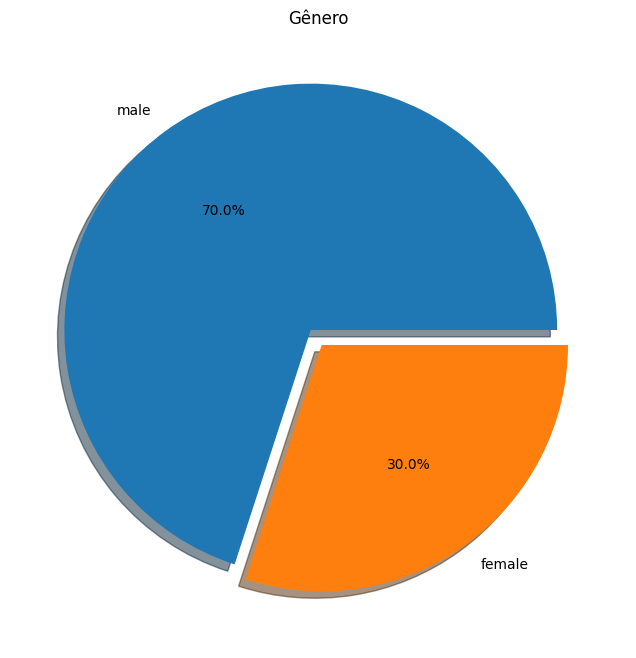

In [18]:
genero_aprovados = analisa(dados_aprovados, 'genero', PCT, False)
genero_aprovados.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    shadow=True,
    explode=[0.05, 0.025]  ,
    title = (f"Gênero")
)

genero
male      36
female    10
other      1
Name: , dtype: int64


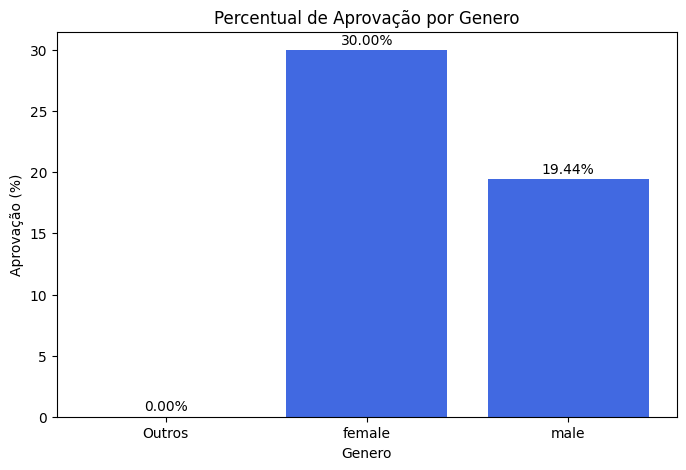

In [32]:
genero_geral = analisa(dados_geral, 'genero', PCT, False)

relacao_genero = pd.DataFrame({'aprovado': genero_aprovados, 'Total_Alunos': genero_geral})
relacao_genero['aprovado'] = relacao_genero['aprovado'].fillna(0)
relacao_genero['Percentual_Aprovado'] = (relacao_genero['aprovado'] / relacao_genero['Total_Alunos']) * 100

plt.figure(figsize=(8, 5))
plt.bar(relacao_genero.index, relacao_genero['Percentual_Aprovado'], color='royalblue')

plt.xlabel('Genero')
plt.ylabel('Aprovação (%)')
plt.title('Percentual de Aprovação por Genero')

for i, v in enumerate(relacao_genero['Percentual_Aprovado']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

cidade
Vila Velha          11
Serra               11
Cariacica           10
Vitória              9
Guarapari            4
Domingos Martins     2
Name: , dtype: int64


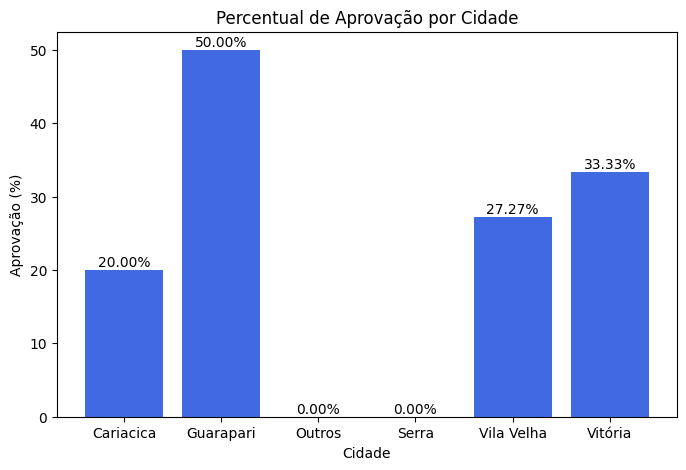

In [34]:
cidade_geral = analisa(dados_geral, 'cidade', PCT, False)

relacao_cidade = pd.DataFrame({'aprovado': cidade_aprovados, 'Total_Alunos': cidade_geral})
relacao_cidade['aprovado'] = relacao_cidade['aprovado'].fillna(0)
relacao_cidade['Percentual_Aprovado'] = (relacao_cidade['aprovado'] / relacao_cidade['Total_Alunos']) * 100

plt.figure(figsize=(8, 5))
plt.bar(relacao_cidade.index, relacao_cidade['Percentual_Aprovado'], color='royalblue')

plt.xlabel('Cidade')
plt.ylabel('Aprovação (%)')
plt.title('Percentual de Aprovação por Cidade')

for i, v in enumerate(relacao_cidade['Percentual_Aprovado']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()